In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import constants
from scipy.stats import pearsonr
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

$$
C_0=10.046nF\\
V(t)=96.9mV\\
V_i=\frac{C_x}{C_0}V(t)\\
\therefore C_x=\frac{C_0V_i}{V(t)}
$$

In [2]:
data=pd.read_csv('IN5401.csv')
print(data.to_markdown())

|    |   vr_v |   vi_muv |
|---:|-------:|---------:|
|  0 |  0.1   |   2722   |
|  1 |  0.207 |   2400   |
|  2 |  0.3   |   2231   |
|  3 |  0.408 |   2079   |
|  4 |  0.503 |   1967   |
|  5 |  0.612 |   1867   |
|  6 |  0.82  |   1701   |
|  7 |  1.003 |   1585   |
|  8 |  2.012 |   1217   |
|  9 |  3.009 |   1031   |
| 10 |  4.06  |    909   |
| 11 |  5.017 |    833.5 |
| 12 |  5.977 |    774.3 |
| 13 |  6.924 |    728.5 |
| 14 |  7.923 |    688.7 |
| 15 |  9.004 |    653.5 |
| 16 |  9.896 |    629.5 |


In [3]:
def latex(s):
    t='%.4g'%s
    if 'e' in t:
        t=t.split('e')[0]+'\\times 10^{'+str(int(t.split('e')[1]))+'}'
    return t

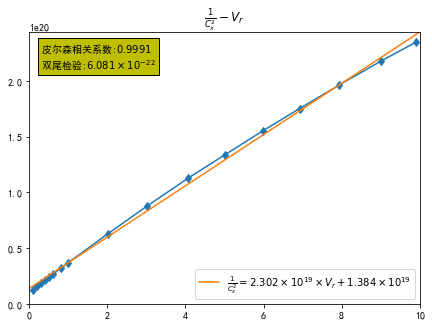

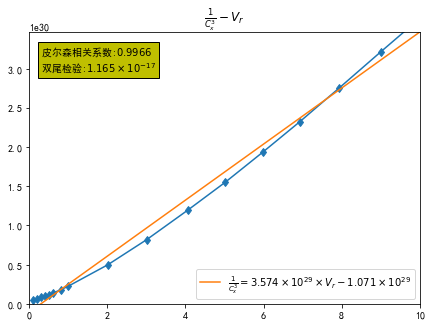

In [4]:
res=[]
for i in range(2,4):
    plt.figure(figsize=[7,5])
    plt.title('$\\frac{1}{C_x^%i}-V_r$'%i)
    plt.xlim(0,10)
    y=data['vi_muv'].values.T*1e-6*10.046e-9/96.9e-3
    y=1/y**i
    x=data['vr_v'].values.T
    fit=np.polyfit(x,y,1)
    res.append(fit)
    x_0=np.linspace(0,10,100)
    y_0=np.polyval(fit,x_0)
    plt.ylim(0,y_0[-1])
    r,p=pearsonr(x,y)
    plt.text(
        0.3,
        y_0[-15],
        s='皮尔森相关系数:$%s$\n双尾检验:$%s$'%(latex(r),latex(p)),
        bbox={
            'boxstyle':'square',
            'fc':'y'
        }
    )
    plt.plot(x,y,marker='d')
    plt.plot(x_0,y_0,label='$\\frac{1}{C_x^%i}=%s\\times V_r%s%s$'%(i,latex(fit[0]),'+' if fit[1]>0 else '',latex(fit[1])))
    plt.legend(loc='lower right')
    plt.savefig(fname='C_x^-%i.svg'%i)
    plt.show()

曲线大致与
$$
\frac{C_x}{A}=\left[\frac{q\varepsilon\varepsilon_0N_D}{2(V_D+V_r)}\right]^2
$$
相符，则由上公式得到
$$
C_x^{-2}=\frac{2(V_D+V_r)}{q\varepsilon\varepsilon_0N_DA^2}
$$
对其作***线性回归***，令  $y=bx+a\quad(y=C_x^{-2},x=V_r)$

因为
$$
y=bx+a\quad(y=C_x^{-2},x=V_r)\\
\left.
\begin{array}{a}
a=\frac{2V_D}{q\varepsilon\varepsilon_0N_DA^2}\\
b=\frac{2}{q\varepsilon\varepsilon_0N_DA^2}
\end{array}
\right\}
\Rightarrow
\left\{
\begin{align}
N_D&=\frac{2}{bA^2q\varepsilon\varepsilon_0}\\
V_D&=\frac ab
\end{align}
\right.
$$
其中 $q=1.6\times10^{-19}c\qquad\varepsilon=11.8\qquad\varepsilon_0=8.854\times10^{-14}F/cm\qquad A\approx0.0025^2\pi m^2$

In [5]:
A=(0.005/2)**2*constants.pi
epsilon_0=constants.epsilon_0
epsilon=11.8
q=constants.e
b=res[0][0]
a=res[0][1]
Nd=2/(b*A**2*q*epsilon*epsilon_0)
Vd=a/b
print(Nd,Vd)

1.3465260080439669e+19 0.6014060084698946
